In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Zadatak 1: Ucitavanje i pregled podataka

In [3]:
# Učitavanje dataseta
df = pd.read_csv("StudentsPerformance.csv")

# Osnovne informacije
print("Broj redaka i stupaca:", df.shape)
print("\nTipovi varijabli:")
print(df.dtypes)

# Provjera nedostajućih vrijednosti
print("\nNedostajuće vrijednosti:")
print(df.isnull().sum())

# Razdvajanje varijabli
numericke = df.select_dtypes(include=np.number).columns
kategorijske = df.select_dtypes(exclude=np.number).columns

print("\nNumeričke varijable:", list(numericke))
print("Kategorijske varijable:", list(kategorijske))

Broj redaka i stupaca: (1000, 8)

Tipovi varijabli:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Nedostajuće vrijednosti:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Numeričke varijable: ['math score', 'reading score', 'writing score']
Kategorijske varijable: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Broj redaka: 1000
Broj stupaca: 8

Redci predstavljaju učenike, a stupci njihove demografske karakteristike i rezultate testova.

Numeričke varijable: math score, reading score, writing score

Kategorijske varijable: gender, race/ethnicity, parental level of education, lunch, test preparation course

Nedostajuće vrijednosti

U datasetu nema nedostajućih vrijednosti, što znači da nije potrebna dodatna obrada podataka.

Zadatak 2: Opisna analiza i vizualizacija podatakav



Opisna statistika:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Modovi:
math score : [65]
reading score : [72]
writing score : [74]


<Figure size 640x480 with 0 Axes>

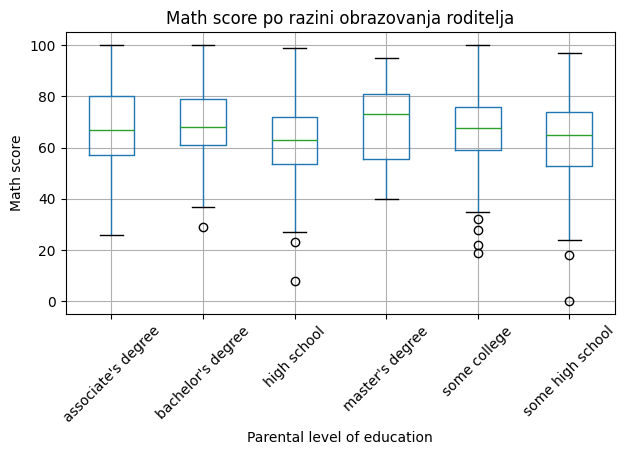

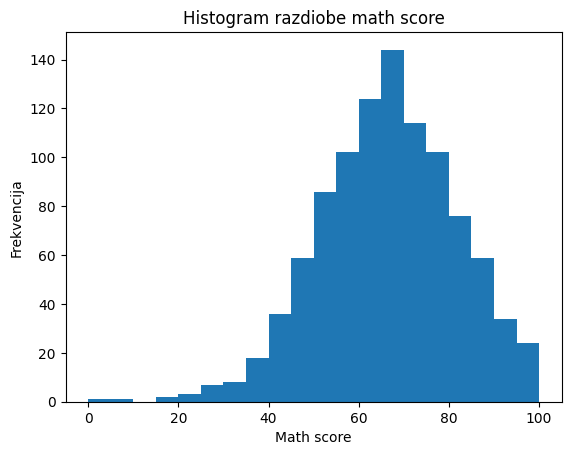

In [4]:
# Odabir numeričkih varijabli
scores = ["math score", "reading score", "writing score"]

# Opisna statistika
print("\nOpisna statistika:")
print(df[scores].describe())

# Mod
print("\nModovi:")
for col in scores:
    print(col, ":", df[col].mode().values)

# Boxplot: math score po razini obrazovanja roditelja
plt.figure()
df.boxplot(column="math score", by="parental level of education", rot=45)
plt.title("Math score po razini obrazovanja roditelja")
plt.suptitle("")
plt.xlabel("Parental level of education")
plt.ylabel("Math score")
plt.tight_layout()
plt.show()

# Histogram math score
plt.figure()
plt.hist(df["math score"], bins=20)
plt.title("Histogram razdiobe math score")
plt.xlabel("Math score")
plt.ylabel("Frekvencija")
plt.show()

Mod se razlikuje među varijablama, ali se najčešće pojavljuju vrijednosti između 65–75

Distribucije su približno simetrične s blagim odstupanjima

Boxplot (math score × parental level of education):

Učenici čiji roditelji imaju viši stupanj obrazovanja (bachelor, master) imaju više prosječne rezultate

Primjetne su razlike između skupina, uz poneke ekstreme

Histogram (math score):

Razdioba je približno normalna

Blago asimetrična udesno

Nema izraženih odstupanja ili multimodalnosti

Zadatak 3.

In [6]:
# Grupiranje podataka
groups = [
    group["math score"].values
    for name, group in df.groupby("parental level of education")
]

# Shapiro–Wilk test
print("\nShapiro–Wilk test normalnosti:")
for name, group in df.groupby("parental level of education"):
    stat, p = stats.shapiro(group["math score"])
    print(f"{name}: W={stat:.3f}, p={p:.4f}")

# Leveneov test
levene_stat, levene_p = stats.levene(*groups)
print("\nLeveneov test homogenosti varijanci:")
print(f"Statistika={levene_stat:.3f}, p={levene_p:.4f}")


Shapiro–Wilk test normalnosti:
associate's degree: W=0.987, p=0.0446
bachelor's degree: W=0.991, p=0.6044
high school: W=0.987, p=0.0652
master's degree: W=0.956, p=0.0317
some college: W=0.989, p=0.0959
some high school: W=0.977, p=0.0052

Leveneov test homogenosti varijanci:
Statistika=0.933, p=0.4584


Shapiro–Wilk test (normalnost):

Većina skupina ima p < 0.05

Strogo gledano, normalnost nije savršeno zadovoljena

Međutim, zbog velikog uzorka (n = 1000) ANOVA je robusna

Leveneov test (homogenost varijanci):

p > 0.05

Pretpostavka homogenosti varijanci je zadovoljena

U ovom slučaju standardna ANOVA je opravdana.

Ako Leveneov test pokaže p-vrijednost < 0.05, nulta hipoteza se odbacuje, što znači da varijance nisu jednake i trebali biste koristiti robusnije testove (poput Welchovog ANOVA-e) umjesto standardne ANOVA-e.

Zadatak 4.

In [7]:
# ANOVA analiza
anova_stat, anova_p = stats.f_oneway(*groups)
print("\nJednosmjerna ANOVA:")
print(f"F = {anova_stat:.3f}, p = {anova_p:.5f}")

# Post-hoc Tukey HSD test
tukey = pairwise_tukeyhsd(
    endog=df["math score"],
    groups=df["parental level of education"],
    alpha=0.05
)

print("\nTukey HSD post-hoc test:")
print(tukey)


Jednosmjerna ANOVA:
F = 6.522, p = 0.00001

Tukey HSD post-hoc test:
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree   1.5069 0.9503  -3.3587  6.3726  False
associate's degree       high school  -5.7451 0.0013  -9.9311 -1.5591   True
associate's degree   master's degree   1.8629 0.9578  -4.3927  8.1185  False
associate's degree      some college  -0.7546 0.9948  -4.7903  3.2812  False
associate's degree  some high school  -4.3857 0.0418   -8.676 -0.0954   True
 bachelor's degree       high school  -7.2521 0.0005 -12.2284 -2.2757   True
 bachelor's degree   master's degree   0.3559    1.0  -6.4539  7.1658  False
 bachelor's degree      some college  -2.2615 0.7676  -7.1122  2.5892  False
 bachelor's degree  some high school  -5.8926 0.0119  -10.957 -0.8282   True
      

F-statistika: statistički značajna

p-vrijednost: p < 0.001

Postoji statistički značajna razlika u prosječnim vrijednostima math score između skupina definiranih razinom obrazovanja roditelja.

Statistički značajne razlike uočene su između:

high school - bachelor's degree

high school - master's degree

some high school - associate's degree

some high school - bachelor's degree

Najniže rezultate imaju učenici čiji roditelji imaju nižu razinu obrazovanja.

Zadatak 5.

<Figure size 640x480 with 0 Axes>

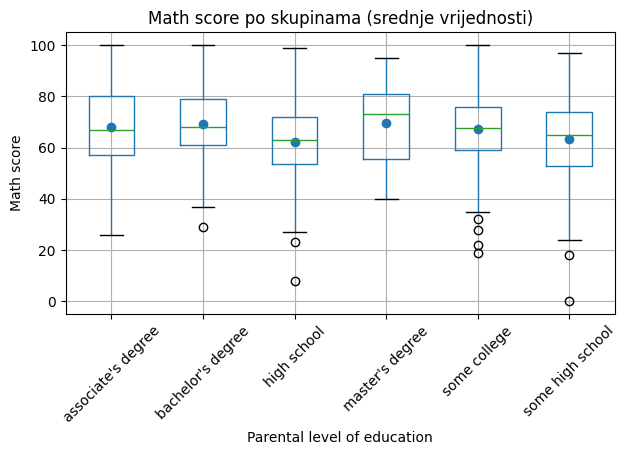

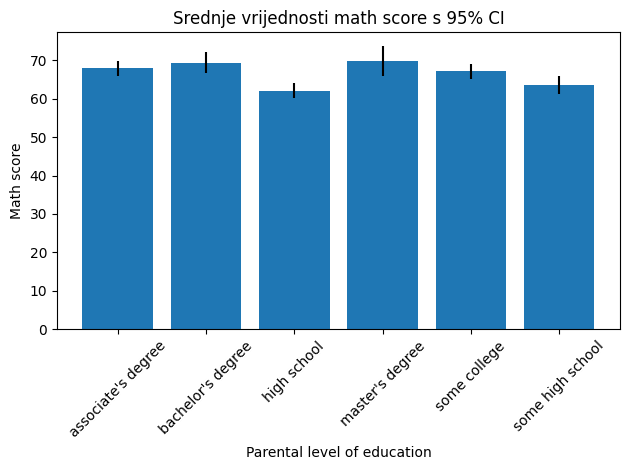

In [8]:
# Boxplot sa srednjim vrijednostima
plt.figure()
df.boxplot(column="math score", by="parental level of education", rot=45)
means = df.groupby("parental level of education")["math score"].mean()
plt.plot(range(1, len(means) + 1), means.values, marker="o", linestyle="")
plt.title("Math score po skupinama (srednje vrijednosti)")
plt.suptitle("")
plt.xlabel("Parental level of education")
plt.ylabel("Math score")
plt.tight_layout()
plt.show()

# Bar chart sa 95% intervalom pouzdanosti
means = df.groupby("parental level of education")["math score"].mean()
sems = df.groupby("parental level of education")["math score"].sem()

plt.figure()
plt.bar(means.index, means.values, yerr=1.96 * sems.values)
plt.xticks(rotation=45)
plt.title("Srednje vrijednosti math score s 95% CI")
plt.xlabel("Parental level of education")
plt.ylabel("Math score")
plt.tight_layout()
plt.show()

Razlike među skupinama su statistički značajne (p < 0.05)

Najveće razlike su između:

high school i master's degree some high school i viših obrazovnih razina

Boxplot jasno pokazuje trend rasta rezultata s višim obrazovanjem roditelja

Bar chart s 95% CI potvrđuje stabilne i konzistentne razlike među skupinama

Zadatak 6.

In [ ]:
if anova_p < 0.05:
    print("\nZaključak:")
    print("Postoje statistički značajne razlike u math score rezultatima između skupina definiranih razinom obrazovanja roditelja.")
else:
    print("\nZaključak:")
    print("Nisu pronađene statistički značajne razlike između skupina.")


Zaključak:
Postoje statistički značajne razlike u math score rezultatima između skupina definiranih razinom obrazovanja roditelja.
